# Stochastic Models: Monte Carlo Methods

### Goals for Today
- Define Monte Carlo Methods and state advantages/disadvantes of the methodology
- Implement and analyze Monte Carlo Methods in a variety of examples

### Pre-Lecture Activities

- Read: Section 1.1 and 1.3 from *Monte Carlo Methods* by Malvin Kalos and Paula Whitlock.  An online pdf of the book is available for free through the UBC Library.

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
%matplotlib inline


print("packages imported")

packages imported


### Flipping a Coin
Write a Monte Carlo method to model a coin flip.

What should the average be as we add more and more coin flips?

In [2]:
# head = 0, tail = 1
def coin():
    return random.randint(0,1)

flips = []
average_flip = []

def monte_carlo_coin(n):
    for i in range(n):
        flip = coin()
        flips.append(flip) 
        average_flip.append(np.mean(flips)) # take the average of all tails so far 
    return 

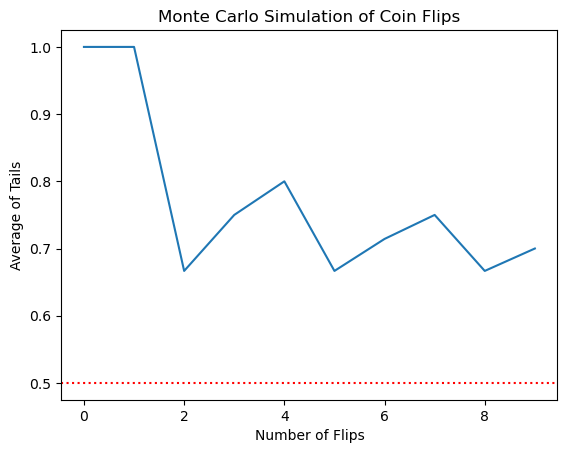

In [3]:
monte_carlo_coin(n=10)
plt.plot(average_flip)
plt.axhline(y=0.5, color='r', linestyle=':')
plt.xlabel("Number of Flips")
plt.ylabel("Average of Tails")
plt.title("Monte Carlo Simulation of Coin Flips")
plt.show()

### Dice Sum
Using Monte Carlo, simulate rolling two dice and tracking the sum.  In particular, simulate 200 dice rolls and then plot the distribution of the sums.  

In [9]:
def two_dice():
    return (random.randint(1,6), random.randint(1,6))

dice_sum = []
dice_sum_avg = []
def monte_carlo_dice(n):
    for i in range(n):
        die_1, die_2 = two_dice()
        dice_sum.append(die_1 + die_2)
        dice_sum_avg.append(np.mean(dice_sum))
    return

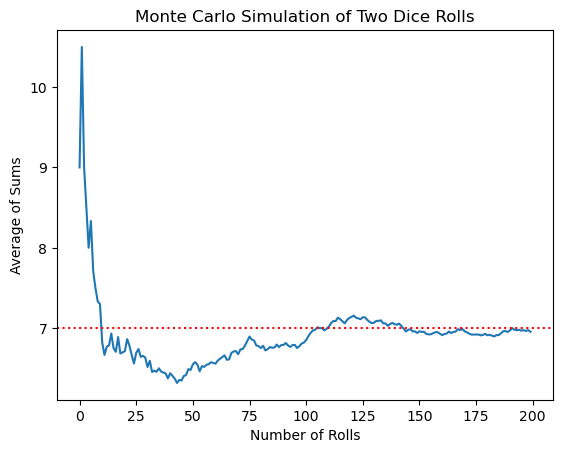

In [10]:
monte_carlo_dice(200)
plt.plot(dice_sum_avg)
plt.axhline(y=7, color='r', linestyle=':')
plt.xlabel("Number of Rolls")
plt.ylabel("Average of Sums")
plt.title("Monte Carlo Simulation of Two Dice Rolls")
plt.show()

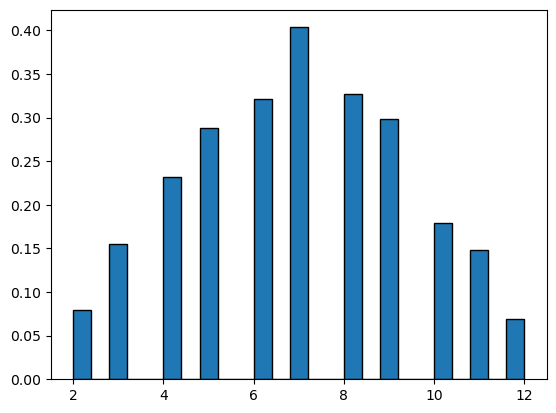

In [11]:
monte_carlo_dice(2000)
count, bins, error = plt.hist(dice_sum, bins=25, density=True, edgecolor='black')
plt.show()

### Rolling a Die -- Monte Carlo
Using Monte Carlo, construct a model that will produce the probability density of rolling a die. 

Then answer the following questions:
- Do the plots look how you would expect?
- What happens when you increase the number of Monte Carlo simulations?
    - Why do you think you are seeing this effect?
- What are the advantages and disadvantages of using a Monte Carlo simulation in this context? 

### Transit Travel Time

Let's suppose we have to take two buses to reach UBC campus from where we live.  The first bus ride is an average of 11 minutes, with a variance of 2 minutes, and the second bus ride is an average of 20 minutes, with a variance of 4 minutes.  Let's further assume that each bus trip is normally distributed.

Construct a model to calculate the probability that the time to reach campus is less than 30 minutes.

**Problem Statement** 

Model the transit time to campus assuming we take two buses that are normally distributed random variables.

Determine the probability that the transit time to campus is less than 30 minutes 

How early should we get up to get to campus?

**Variables & Parameters**
- $x_1$ - time for the first bus trip
- $x_2$ - time for the second bus trip
- $y$ - total travel time

- $\mu_1$ - mean time for first bus trip
- $\sigma_1^{2}$ - variance time for the first bus trip 
- $\mu_2$ - mean time for second bus trip
- $\sigma_2^{2}$ - variance time for the second bus trip

**Assumptions + Constraints**
- $x_1$ and $x_2$ are independent events
- there is no wait time between the first and second bus

In [18]:
# Model
def model():
    X1 = np.random.normal(11, 2)
    X2 = np.random.normal(20, 4)

    return X1 + X2

In [19]:
travel_times = []
def monte_carlo_bus(n):
    for i in range(n):
        travel_times.append(model())
    return

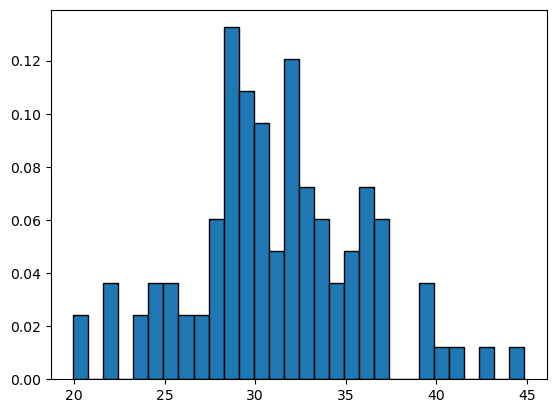

In [20]:
monte_carlo_bus(100)
count, bins, error = plt.hist(travel_times, bins=30, density=True, edgecolor='black')
plt.show()

### Transit Travel Time 2

Let's again suppose we have to take two buses to reach UBC campus from where we live.  The first bus ride is an average of 11 minutes, with a variance of 2 minutes, and the second bus ride is an average of 20 minutes, with a variance of 4 minutes.  Let's further assume that each bus trip is normally distributed.

Between getting off of the first bus and getting on the second bus, we have to wait an average of 5 minutes.  Assume that the wait time is exponentially distributed.  

Construct a model to calculate the probability that the time to reach campus is less than 30 minutes.